In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load and Process Image

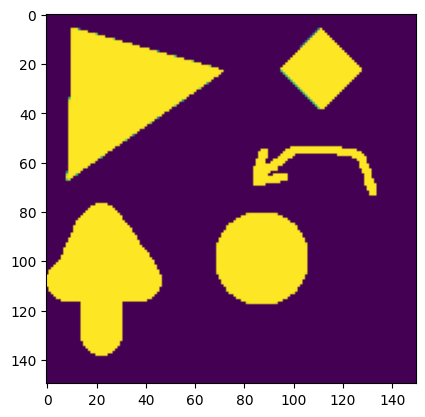

In [3]:
input_path = "./assets/shapes.png"
input_image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

# Convert to binary image
_, binary_image = cv2.threshold(input_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(input_image)

UNION AND FIND FUNCTION

In [4]:
def find_root(label, parent):
    while parent[label] != label:
        label = parent[label]
    return label

def union(label1, label2, parent):
    root1 = find_root(label1, parent)
    root2 = find_root(label2, parent)
    if root1 != root2:
        parent[root2] = root1

FIRST PASS

In [5]:
def first_pass(image):
    height, width = image.shape
    labels = np.zeros((height, width), dtype=int)
    current_label = 1
    parent = {0: 0}

    for y in range(height):
        for x in range(width):
            if image[y, x] == 0:
                continue  
            neighbors = []

            if y > 0 and image[y - 1, x] > 0:
                neighbors.append(labels[y - 1, x])
            if x > 0 and image[y, x - 1] > 0:
                neighbors.append(labels[y, x - 1])

            if not neighbors:
                labels[y, x] = current_label
                parent[current_label] = current_label
                current_label += 1
            else:
                min_label = min(neighbors)
                labels[y, x] = min_label
                for neighbor in neighbors:
                    union(min_label, neighbor, parent)

    # Flatten the equivalence table
    for label in parent:
        parent[label] = find_root(label, parent)

   
    print("\nLabel Matrix After First Pass:\n")
    print(labels)

    print("\nEquivalence Table After Flattening:\n")
    for key in sorted(parent.keys()):
        print(f"Label {key}: Root {parent[key]}")

    return labels, parent
labels, parent = first_pass(binary_image)


Label Matrix After First Pass:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Equivalence Table After Flattening:

Label 0: Root 0
Label 1: Root 1
Label 2: Root 2
Label 3: Root 2
Label 4: Root 2
Label 5: Root 2
Label 6: Root 2
Label 7: Root 2
Label 8: Root 2
Label 9: Root 2
Label 10: Root 2
Label 11: Root 2
Label 12: Root 2
Label 13: Root 2
Label 14: Root 2
Label 15: Root 2
Label 16: Root 2
Label 17: Root 2
Label 18: Root 2
Label 19: Root 1
Label 20: Root 21
Label 21: Root 21
Label 22: Root 21
Label 23: Root 21
Label 24: Root 21
Label 25: Root 21
Label 26: Root 21
Label 27: Root 21
Label 28: Root 21
Label 29: Root 21
Label 30: Root 21
Label 31: Root 1
Label 32: Root 21
Label 33: Root 33
Label 34: Root 33
Label 35: Root 33
Label 36: Root 33
Label 37: Root 33
Label 38: Root 38
Label 39: Root 33
Label 40: Root 38
Label 41: Root 33
Label 42: Root 38
Label 43: Root 33
Label 44: Root 38
Label 45: Root 38
Label 46: Ro

SECOND PASS

In [8]:
def second_pass(labels, parent):
    height, width = labels.shape
    label_map = {}
    new_label = 1
    color_map = {}
    output_image = np.zeros((height, width, 3), dtype=np.uint8)

    def get_random_color():
        return np.random.randint(0, 256, size=3, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            if labels[y, x] > 0:
                root_label = find_root(labels[y, x], parent)
                if root_label not in label_map:
                    label_map[root_label] = new_label
                    color_map[new_label] = get_random_color()
                    new_label += 1
                final_label = label_map[root_label]
                output_image[y, x] = color_map[final_label]

    return output_image
output_image = second_pass(labels, parent)


MAIN FUNCTION